<a href="https://colab.research.google.com/github/asepmuhidin/mk-python/blob/master/covid19_asean(A_Muhidin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafik terkonfirmasi positif Covid-19 negara ASEAN
# Prediksi Terkonfirmasi Virus menggunakan Pertumbuhan Eksponensial
## Asep Muhidin, Universitas Pelita Bangsa 19-05-2020 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

In [0]:
raw_data="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data=pd.read_csv(raw_data)

In [0]:
negara_asean=['Indonesia','Malaysia','Singapore','Thailand','Vietnam','Philippines']
data=data.loc[data['Country/Region'].isin(negara_asean)]

In [0]:
#hilangkan kolom Province/state, lat, long
data.drop(columns=['Province/State','Lat','Long'],axis=1, inplace=True) 

In [0]:
import datetime 
tgl=[datetime.datetime.strptime(t,'%m/%d/%y') for t in data.columns[1:None]]
confirm_data={'tanggal':tgl}

for negara in data['Country/Region'] :
  data_per_negara=data.loc[data['Country/Region']==negara]
  v=[val for val in data_per_negara.values]
  v=v[0].tolist()
  v=v[1:None]
  confirm_data[negara]=v

In [46]:
data_oke=pd.DataFrame(confirm_data)
data_oke.tail()

,tanggal,Indonesia,Malaysia,Philippines,Singapore,Thailand,Vietnam
113,2020-05-14,16006,6819,11876,26098,3018,312
114,2020-05-15,16496,6855,12091,26891,3025,314
115,2020-05-16,17025,6872,12305,27356,3025,318
116,2020-05-17,17514,6894,12513,28038,3028,320
117,2020-05-18,18010,6941,12718,28343,3031,324


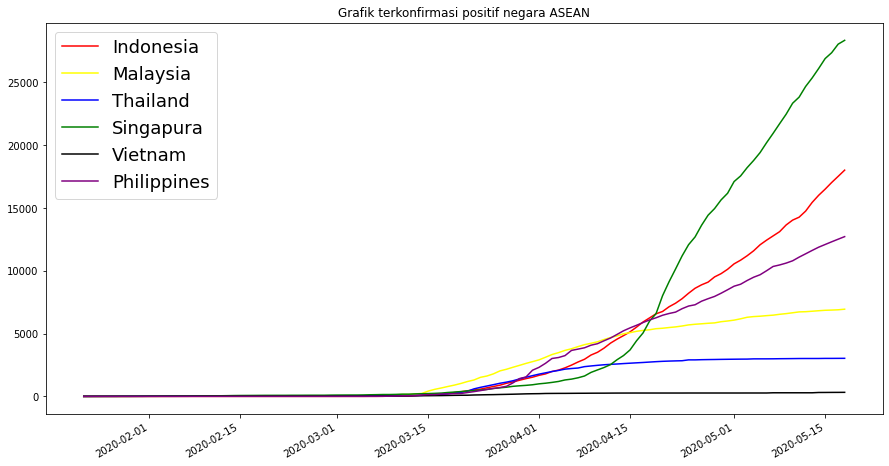

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
fig.autofmt_xdate()
ax.fmt_xdata = mdate.DateFormatter('%m-%d')
ax.plot(data_oke.tanggal,data_oke.Indonesia, label='Indonesia', c='red')
ax.plot(data_oke.tanggal,data_oke.Malaysia, label='Malaysia', c='yellow')
ax.plot(data_oke.tanggal,data_oke.Thailand, label='Thailand', c='blue')
ax.plot(data_oke.tanggal,data_oke.Singapore, label='Singapura', c='green')
ax.plot(data_oke.tanggal,data_oke.Vietnam, label='Vietnam', c='black')
ax.plot(data_oke.tanggal,data_oke.Philippines, label='Philippines', c='Purple')

plt.title('Grafik terkonfirmasi positif negara ASEAN')
plt.rc('legend', fontsize=18) 
plt.legend(loc="upper left")


In [0]:
data_ina=data_oke[['tanggal','Indonesia']]

In [0]:
data_ina=data_ina.loc[data_ina['Indonesia']>2]
#data_ina

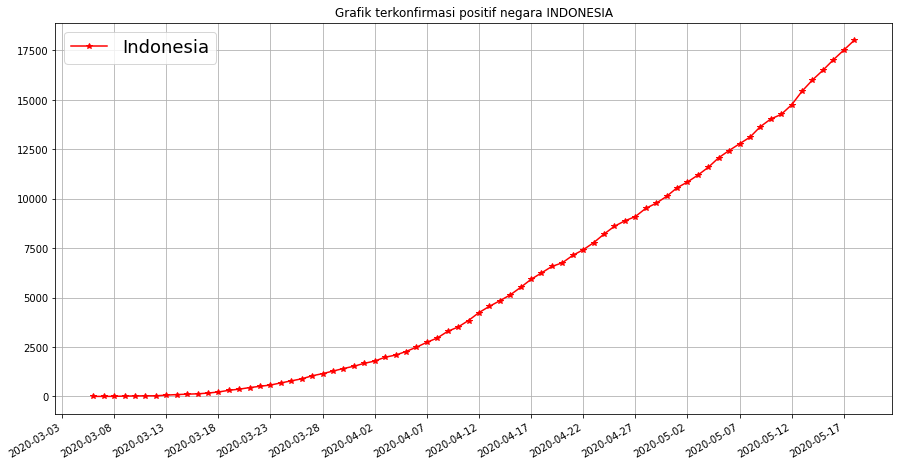

In [98]:
from matplotlib.dates import DayLocator
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
fig,ax=plt.subplots(figsize=(15,8))
fig.autofmt_xdate()
ax.fmt_xdata = mdate.DateFormatter('%m-%d')
ax.plot(data_ina.tanggal,data_ina.Indonesia, label='Indonesia', c='red', marker='*')
plt.title('Grafik terkonfirmasi positif negara INDONESIA')
plt.rc('legend', fontsize=18) 
plt.legend(loc="upper left")
plt.grid(True, which='both')
plt.yscale('linear')
ax.xaxis.set_major_locator(DayLocator(bymonthday=None,interval=5))

In [101]:
data_ina

,tanggal,Indonesia,y
44,2020-03-06,4,0
45,2020-03-07,4,2
46,2020-03-08,6,13
47,2020-03-09,19,8
48,2020-03-10,27,7
...,...,...,...
113,2020-05-14,16006,490
114,2020-05-15,16496,529
115,2020-05-16,17025,489
116,2020-05-17,17514,496


In [0]:
r_5=[data_ina['Indonesia'].iloc[i] for i in range(0,len(data_ina)-1,4)]


###Rumus Laju Pertumbuhan Pendduduk

![Rumus Laju Pertumbuhan Pendduduk](https://cdn.staticaly.com/img/4.bp.blogspot.com/-ycKNvz47TXs/UjULuTZaCVI/AAAAAAAAB5E/znDMKIMBzrY/s1600/pertumbuhan+penduduk+eksponensial.png)

###Rumus Rasion Pertumbuhan Pendduduk
![alt text](https://cdn.staticaly.com/img/3.bp.blogspot.com/-wIDFJuRKkdg/UjUL2rvF4oI/AAAAAAAAB5Q/tpi4N5URf4A/s1600/laju+pertumbuhan+penduduk+eksponensial.png)

In [0]:
import math as mt
def P(P0,rt,t):
  return P0*mt.exp(rt*t)

def r(t,Pt,P0):
  return 1/t* mt.log(Pt/P0)

In [0]:
r_5

In [0]:
rasio_5=[r(5,r_5[i+1],r_5[i]) for i in range(0,len(r_5)-1,2)]


In [0]:
rasio_5

In [0]:
r_p=sum(rasio_5)/len(rasio_5)

In [0]:
P_t=[]
for i in range(len(data_ina)):
  P_t.append(P(data_ina['Indonesia'].iloc[i],r_p,1))


In [175]:
data_ina['pred']=P_t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data_ina

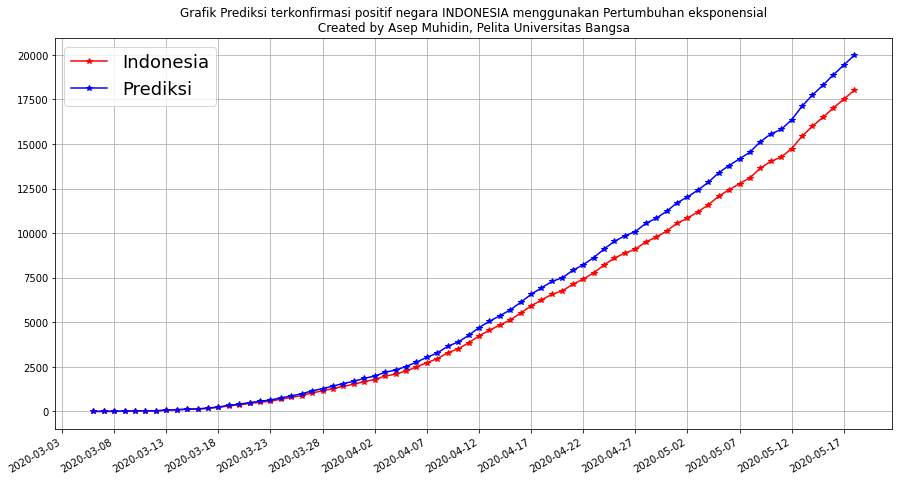

In [180]:
from matplotlib.dates import DayLocator
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
fig,ax=plt.subplots(figsize=(15,8))
fig.autofmt_xdate()
ax.fmt_xdata = mdate.DateFormatter('%m-%d')
ax.plot(data_ina.tanggal,data_ina.Indonesia, label='Indonesia', c='red', marker='*')
ax.plot(data_ina.tanggal,data_ina.pred, label='Prediksi', c='blue', marker='*')

plt.title('Grafik Prediksi terkonfirmasi positif negara INDONESIA menggunakan Pertumbuhan eksponensial\n Created by Asep Muhidin, Pelita Universitas Bangsa ')
plt.rc('legend', fontsize=18) 
plt.legend(loc="upper left")
plt.grid(True, which='both')
plt.yscale('linear')
ax.xaxis.set_major_locator(DayLocator(bymonthday=None,interval=5))